# Hauptkomponentenanalyse (Principal Component Analysis) 

## Was ist die PCA?

Die Hauptkomponentenanalyse (PCA) ist ein Verfahren zur Dimensionsreduktion in der Künstlichen Intelligenz und im maschinellen Lernen. Sie wird eingesetzt, um große, komplexe Datensätze mit vielen Merkmalen übersichtlicher und analysierbar zu machen. Ziel ist es, die wichtigsten Strukturen und Muster in den Daten zu erkennen, indem unwichtige oder redundante Informationen entfernt werden.

## Wie funktioniert die PCA?

Mathematisch basiert PCA auf der linearen Algebra. Die Methode sucht nach neuen Achsen (den sogenannten Hauptkomponenten), entlang derer die Daten die größte Varianz aufweisen. Dazu wird die Kovarianzmatrix der Daten berechnet und deren Eigenvektoren und Eigenwerte bestimmt. Die Eigenvektoren geben die Richtung der Hauptkomponenten an, die Eigenwerte deren Bedeutung (Varianzanteil). Die Daten werden dann auf die ersten Hauptkomponenten projiziert, sodass möglichst viel Information erhalten bleibt, aber die Anzahl der Dimensionen reduziert wird.

## Wozu dient die PCA?

Mit PCA kann man Datensätze visualisieren, indem man sie auf zwei oder drei Hauptkomponenten reduziert. Außerdem hilft PCA, die Rechenzeit und den Speicherbedarf für weitere Analysen zu verringern und Rauschen oder irrelevante Merkmale zu entfernen. PCA wird häufig als Vorverarbeitungsschritt für Klassifikations-, Cluster- oder Regressionsverfahren verwendet.

## Die PCA an Beispielen

`sklearn` hat auch Funktionen zur Arbeit mit der PCA. 

## Beispieldaten erzeugen

In [1]:
import numpy as np
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

Wir erzeugen mit `sklearn` einen Beispieldatensatz mit 4 Features

In [33]:
n_features = 4
X, y = make_classification(n_samples=200, n_features=n_features, n_informative=2, n_classes=2, random_state=42)

## Visualisierung

Wir zeigen alle Projektionen auf jeweils 2 Achsen

In [34]:
def plot_axes(X,y, n_features):
    fig, axes = plt.subplots(n_features, n_features, figsize=(8, 8))
    for i in range(n_features):
        for j in range(n_features):
            ax = axes[i, j]
            ax.set_xticks([])
            ax.set_yticks([])        
            if i != j:
                ax.scatter(X[:, i], X[:, j], c=y, cmap='prism', edgecolor='k')                
    plt.tight_layout()
    plt.show()

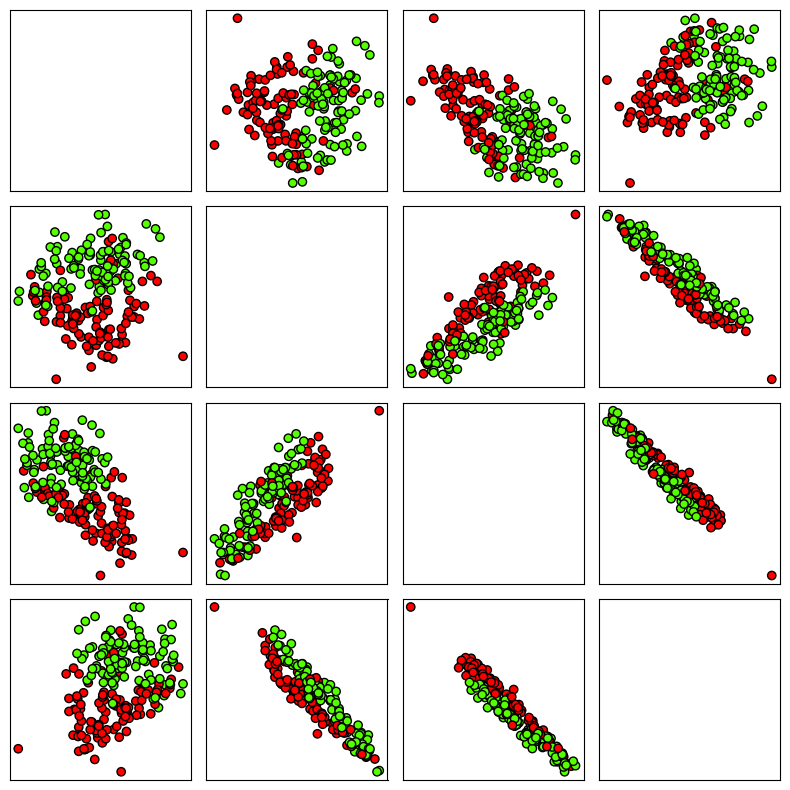

In [24]:
plot_axes(X,y,n_features)

In einigen der Plots erkennt man deutlich, dass die Punkte sehr nahe bei einer Fläche liegen. Die Dimension orthogonal dazu kann also entfernt werden

## Mit PCA auf 2 Dimensionen reduzieren

Wir wenden nun das Softwarepaket zur Dimensionsreduktion mit PCA an:

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Visualisierung

X_pca enthält nun das Ergbns: Die zweidimensionale Prokektion der Daten auf die gefundenen Hauptachsen:

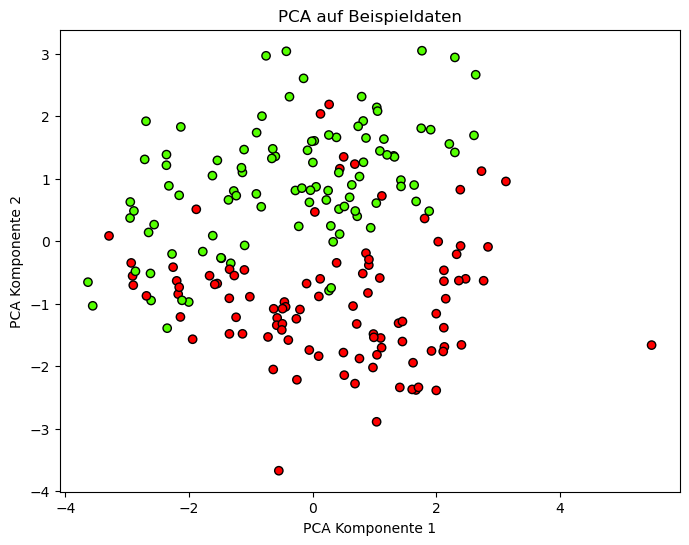

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='prism', edgecolor='k')
plt.xlabel('PCA Komponente 1')
plt.ylabel('PCA Komponente 2')
plt.title('PCA auf Beispieldaten')
plt.show()

Das Ergebnis zeigt ene neue Ansicht auf die Daten, in der diese sehr weit gestreut sind. Hier lässt sich vielleicht eine Trennlinie ziehen.

## Dimensionsreduktion am Beispiel des Iris-Datensatzes

An einem konkreten Fal wird es deutlicher, was bei der PCA geschieht. Wir sehen uns wieder die Iris-Daten an, die vier Merkmale aufweist: Länge und Breite zweier verschiedner Blätter an der Pflanze.

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

### Visualisierung

Wir zeichnen jeweils zwei Merkmale (Achsen) gegeneinander auf.

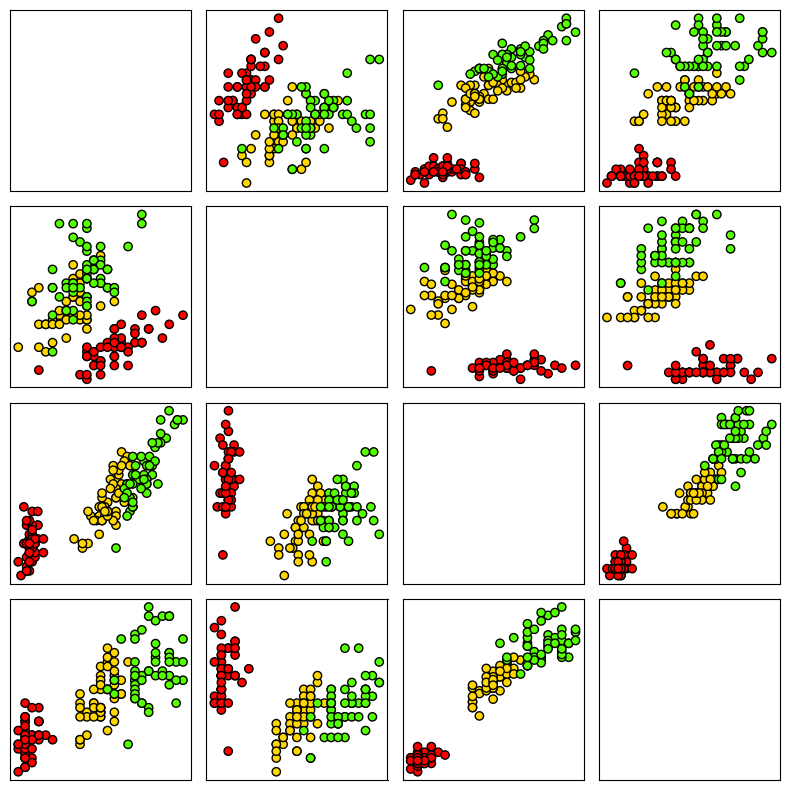

In [28]:
plot_axes(X,y,4)

Diesmal sehen wir kein so deutliches Ergebnis wie bei den zufällig generierten Daten. Zwei paare von Merkmalen fallen aber auf...

### Mit PCA auf 2 Dimensionen reduzieren

In [29]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Visualisierung

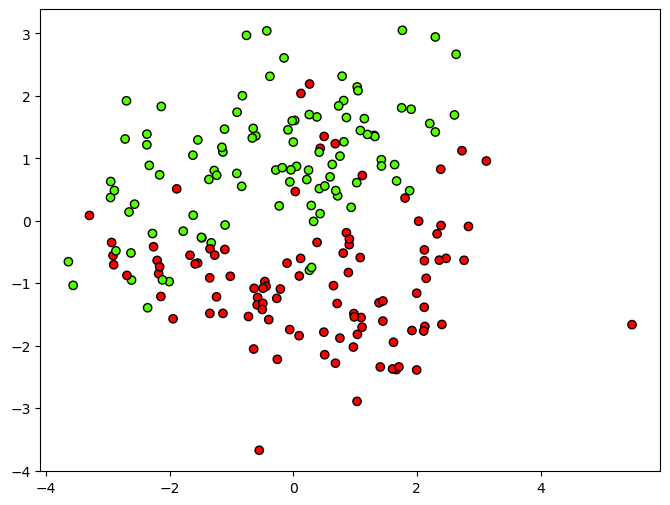

In [46]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='prism', edgecolor='k')
plt.show()

### Was sind die Hauptachsen eigentlich?

Die Wahl der Features beim Iris-Datensatz - Länge und Breite zweier unterschiedlicher Blätter an der Pflanze - erscheint natürlich, denn so wurden die Pflanzen vermessen. Es ist jedoch klar, dass die Größen allein nichts über die Pflanzenart aussagen können, denn eine ausgewachsene Pflanze hat natürlich größere Werte _in allen Features_. Wesentlich wichtiger ist das _Verhältnis_ von Länge und Breite der beiden Blätter, denn diese bestimmt die Form, die unabhängig von der Größe der Pflanze ist, etwa runde oder langgestreckte Blätter, die für die jeweilige Art der Pflanze typisch ist.

Die Hauptkomponenten definieren zwei neue Achsen, die mit den bisherigen Achsen nichts mehr zu tun haben. Bei der Iris könnten diese Achsen die Form der Blätter beschreiben, aber auch eine ganz andere Kombination der ursprünglichen vier Features sein, an die man ursprünglich gar nicht denkt. Eine neue Sicht auf die Daten ,die neue Zusammenhänge offenbart.